In [1]:
# importing the necessary libraries for data visualization and numerical operations
# matplotlib.pyplot is used for plotting graphs, and numpy is used for handling numerical data efficiently

import matplotlib.pyplot as plt
import numpy as np

### Helper functions and variables

In [2]:
# Define an array of abbreviated month names to use as labels on the x-axis of plots
month_name = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

### Digitized measurement results from external sources

In [3]:
# air—Earth current values measured at Kew in Jun 1930 — May 1931
# units are A·m^(−2)
# source: Scrase (1933), Table 2

kew_data = (
    np.array([40, 66, 86, 76, 90, 114, 113, 138, 94, 93, 65, 55])
    * 10**4 * 10**(-18)
)

In [4]:
# air—Earth current values measured at Mauna Loa in 1977–1983
# units are A·m^(−2)
# source: Adlerman & Williams (1996), Fig. 6 (data by Cobb)

mauna_loa_data = (
    np.array([30.8, 31.7, 31.3, 28.0, 33.7, 36.4,
              35.7, 34.1, 33.2, 33.9, 34.0, 32.2])
    * 10**(-13)
)

In [5]:
# air—Earth current values measured at Athens in 1965–1980
# units are A·m^(−2)
# source: Retalis (1991), Fig. 6

athens_data = (
    np.array([23.3, 19.7, 18.4, 21.6, 19.2, 24.1,
              24.1, 26.0, 23.2, 20.5, 21.0, 19.0])
    * 10**(-13)
)

In [6]:
# potential gradient values measured during Carnegie and Maud expeditions
# (1915–1929)
# units are V·m^(−1)
# source: Adlerman & Williams (1996), Fig. 7b

carnegie_maud_data = (
    np.array([121, 131, 128, 121, 131, 161,
              180, 111, 127, 121, 117, 126])
)

In [7]:
# ionospheric potential values measured at different sites over 1955–2004
# units are V
# source: Markson (2007), Fig. 7 (various data)

ip_data = (
    np.array([212, 236, 239, 238, 245, 234,
              240, 263, 260, 255, 229, 262])
    * 10**3
)

In [8]:
# potential gradient values measured at Vostok station in (1998–2001)
# units are V·m^(−1)
# source: Burns et al. (2012), Table 2

vostok_old_data = (
    np.array([195, 201, 205, 192, 188, 195,
              209, 198, 209, 195, 193, 192])
)

### Figure: Seasonal variation based on earlier measurement results

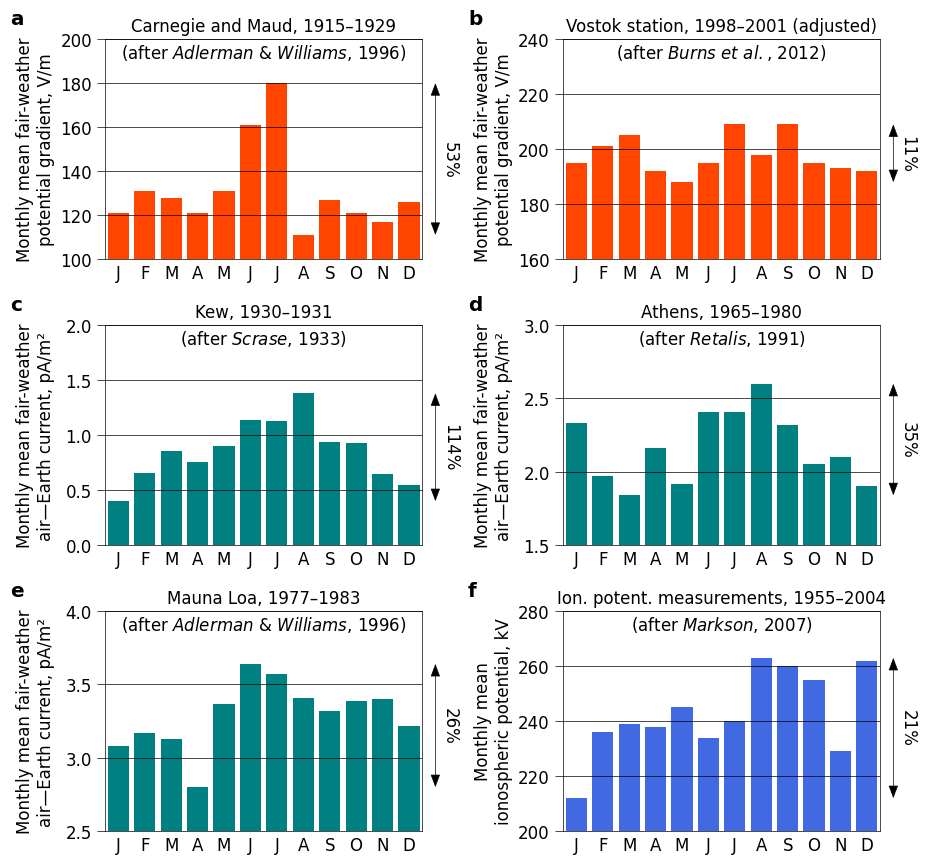

In [9]:
fig = plt.figure(figsize=(10, 14), constrained_layout=False)

# create a list of axes objects to hold subplots.
ax = [None for _ in range(6)]

# configure each subplot in the figure
# subplots are arranged in a 4×4 grid
for n in range(6):
    ax[n] = fig.add_subplot(4, 4, (2*n + 1, 2*n + 2))

# lower, upper limits, y-axis ticks interval, y-scaling coefficient for each subplot
low = [100, 160, 0e-13, 15e-13, 25e-13, 200e3]
high = [200, 240, 20e-13, 30e-13, 40e-13, 280e3]
step = [20, 20, 5e-13, 5e-13, 5e-13, 20e3]
coeff = [1, 1, 1e-12, 1e-12, 1e-12, 1e3]

caption = ['Carnegie and Maud, 1915–1929',
           'Vostok station, 1998–2001 (adjusted)',
           'Kew, 1930–1931',
           'Athens, 1965–1980',
           'Mauna Loa, 1977–1983',
           'Ion. potent. measurements, 1955–2004']

ins_caption = ['(after $\it{Adlerman~&~Williams}$, 1996)',
               '(after $\it{Burns~et~al.}$, 2012)',
               '(after $\it{Scrase}$, 1933)',
               '(after $\it{Retalis}$, 1991)',
               '(after $\it{Adlerman~&~Williams}$, 1996)',
               '(after $\it{Markson}$, 2007)']

data = np.array([carnegie_maud_data,
                 vostok_old_data,
                 kew_data,
                 athens_data,
                 mauna_loa_data,
                 ip_data])

# assign colors for each dataset
col = ['orangered', 'orangered', 'teal', 'teal', 'teal', 'royalblue']

for n in range(6):
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[n].spines[axis].set_linewidth(0.5)
    ax[n].tick_params(length=6, width=0.5, axis='y')
    ax[n].tick_params(length=0, width=0.5, axis='x')
    ax[n].grid(color='0.', linewidth=0.5, axis='y')

    ax[n].set_xlim((-0.5, 11.5))
    ax[n].set_xticks(np.arange(12))
    ax[n].set_xticklabels(month_name, fontsize='large', va='top')

    ax[n].set_ylim((low[n], high[n]))
    ax[n].set_yticks(np.arange(low[n], high[n] + step[n] / 2, step[n]))
    if n in [2, 3, 4]:
        ax[n].set_yticklabels([f'{x:.1f}' for x in
                               np.arange(low[n], high[n] + step[n] / 2,
                                         step[n]) / coeff[n]
                               ],
                              fontsize='large')
        ax[n].set_ylabel('Monthly mean fair-weather\n'
                         'air—Earth current, pA/m²',
                         fontsize='large')
    else:
        ax[n].set_yticklabels((np.arange(low[n], high[n] + step[n] / 2,
                                         step[n]) / coeff[n]).astype(int),
                              fontsize='large')
        if n in [0, 1]:
            ax[n].set_ylabel('Monthly mean fair-weather\n'
                             'potential gradient, V/m',
                             fontsize='large')
        else:
            ax[n].set_ylabel('Monthly mean\nionospheric potential, kV',
                             fontsize='large')

    ax[n].set_title(caption[n], fontsize='large')
    ax[n].text(0.5,
               1 - 0.01
               * (ax[n].get_position().x1 - ax[n].get_position().x0)
               / (ax[n].get_position().y1 - ax[n].get_position().y0)
               * fig.get_size_inches()[0] / fig.get_size_inches()[1],
               ins_caption[n],
               fontsize='large', ha='center', va='top',
               transform=ax[n].transAxes)

    ax[n].annotate('', xy=(12, np.min(data[n])), xycoords='data',
                   xytext=(12, np.max(data[n])), textcoords='data',
                   annotation_clip=False,
                   arrowprops=dict(
                       arrowstyle='<|-|>,head_length=0.8,head_width=0.3',
                       patchA=None, patchB=None, shrinkA=0., shrinkB=0.,
                       connectionstyle='arc3,rad=0.', fc='black',
                       linewidth=0.5
                   ))
    ampl = (np.max(data[n]) - np.min(data[n])) / np.mean(data[n])
    ax[n].text(12.2, (np.min(data[n]) + np.max(data[n])) / 2,
               f'{ampl * 100:.0f}%',
               fontsize='large', ha='left', va='center', rotation=270)

fig.align_ylabels([ax[0], ax[2], ax[4]])
fig.align_ylabels([ax[1], ax[3], ax[5]])

for n in range(6):
    ax[n].bar(np.arange(12), data[n], 0.8, color=col[n])

for n in range(6):
    ax[n].text(-0.3, 1.05, chr(ord('a') + n), fontsize='x-large',
               fontweight='semibold', ha='left', va='bottom',
               transform=ax[n].transAxes)

fig.subplots_adjust(hspace=0.3, wspace=1.6)

fig.savefig('figures_two_parts/earlier_measurements.eps', bbox_inches='tight')